In [1]:
from sklearn.cross_validation import train_test_split
%run ../2/2.py
train = load_feature_matrix("../input/train.csv")
mytrain, mytest = train_test_split(train, test_size = .4)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
title_vectorizer = CountVectorizer(max_features=200)

In [7]:
bow = title_vectorizer.fit_transform(mytrain["Title"]).todense()

# Column i, row j: "how many times does word i appear in title j?"

In [8]:
bow

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
bow.shape

(84163, 200)

In [11]:
words = list(title_vectorizer.vocabulary_.keys())

In [12]:
words

['through',
 'django',
 'but',
 'another',
 'php',
 'memory',
 'inside',
 'type',
 'other',
 'variable',
 'how',
 'books',
 'possible',
 'do',
 'wpf',
 'out',
 'this',
 'jquery',
 'some',
 'mobile',
 'be',
 'form',
 'rails',
 'ios',
 'object',
 'vs',
 'why',
 'way',
 'add',
 'date',
 'or',
 'get',
 'game',
 'as',
 'xml',
 'project',
 'client',
 'with',
 'make',
 'in',
 'element',
 'event',
 'mvc',
 'mysql',
 'name',
 'data',
 'load',
 'design',
 'only',
 'service',
 'read',
 'help',
 'visual',
 'up',
 'best',
 'function',
 'when',
 'have',
 'language',
 'query',
 'at',
 'javascript',
 'are',
 'using',
 'display',
 'google',
 'what',
 'between',
 'source',
 'android',
 'if',
 'issue',
 'java',
 'custom',
 'code',
 'method',
 'html',
 'on',
 'facebook',
 'change',
 'values',
 'which',
 'while',
 'without',
 'of',
 'sql',
 'run',
 'all',
 'file',
 'api',
 'creating',
 'programming',
 'check',
 'class',
 'where',
 'you',
 'simple',
 'open',
 'number',
 'any',
 'python',
 'user',
 'framewor

In [13]:
col_names = ["Title\n" + x for x in words]

In [14]:
col_names

['Title\nthrough',
 'Title\ndjango',
 'Title\nbut',
 'Title\nanother',
 'Title\nphp',
 'Title\nmemory',
 'Title\ninside',
 'Title\ntype',
 'Title\nother',
 'Title\nvariable',
 'Title\nhow',
 'Title\nbooks',
 'Title\npossible',
 'Title\ndo',
 'Title\nwpf',
 'Title\nout',
 'Title\nthis',
 'Title\njquery',
 'Title\nsome',
 'Title\nmobile',
 'Title\nbe',
 'Title\nform',
 'Title\nrails',
 'Title\nios',
 'Title\nobject',
 'Title\nvs',
 'Title\nwhy',
 'Title\nway',
 'Title\nadd',
 'Title\ndate',
 'Title\nor',
 'Title\nget',
 'Title\ngame',
 'Title\nas',
 'Title\nxml',
 'Title\nproject',
 'Title\nclient',
 'Title\nwith',
 'Title\nmake',
 'Title\nin',
 'Title\nelement',
 'Title\nevent',
 'Title\nmvc',
 'Title\nmysql',
 'Title\nname',
 'Title\ndata',
 'Title\nload',
 'Title\ndesign',
 'Title\nonly',
 'Title\nservice',
 'Title\nread',
 'Title\nhelp',
 'Title\nvisual',
 'Title\nup',
 'Title\nbest',
 'Title\nfunction',
 'Title\nwhen',
 'Title\nhave',
 'Title\nlanguage',
 'Title\nquery',
 'Title\nat

In [21]:
bow_df = pd.DataFrame(bow, index=mytrain.index, columns = col_names)

In [22]:
bow_df.head()

,Title through,Title django,Title but,Title another,Title php,Title memory,Title inside,Title type,Title other,Title variable,...,Title string,Title find,Title write,Title site,Title has,Title and,Title there,Title by,Title not,Title different
38360,0,0,0,0,0,0,0,1,0,0,...,0,0,2,0,0,0,0,0,0,0
82581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
mytrain_expanded = mytrain.join(bow_df)

In [26]:
mytrain_expanded["Title\nwithout"]

38360     0
82581     0
19331     0
34474     0
135384    0
28739     0
139239    0
39317     0
40544     0
103337    0
39724     0
94824     0
12842     0
37019     0
27054     0
77505     0
75624     0
52929     0
42709     0
8658      0
79998     0
43715     0
40935     0
23463     0
31666     0
12668     0
120851    0
91493     0
103120    0
26151     0
         ..
40308     0
103592    0
125359    0
124670    0
94985     0
260       0
113009    0
20494     0
82278     0
40370     0
120128    0
82191     0
77583     0
12873     0
124563    0
113159    0
100822    0
131735    0
94091     0
118549    0
133301    0
114062    0
77613     0
17615     0
94656     0
121047    0
41422     0
63747     0
43014     0
124827    0
Name: Title\nwithout, dtype: int64

(0, 10)

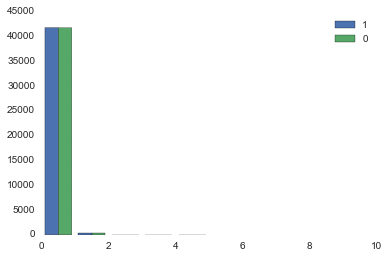

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.autoscale(enable=True)
%matplotlib inline

feature = "Title\nwithout"
plt.hist([mytrain_expanded[mytrain_expanded.OpenStatus==1][feature].values, 
          mytrain_expanded[mytrain_expanded.OpenStatus==0][feature].values], range(6), label=[1,0])
plt.legend()
plt.xlim(0,10)

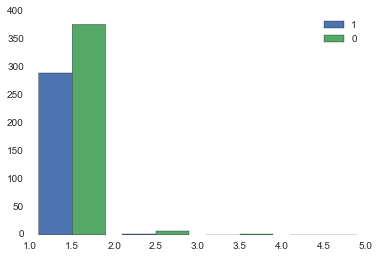

In [29]:
plt.hist([mytrain_expanded[mytrain_expanded.OpenStatus==1][feature].values, 
          mytrain_expanded[mytrain_expanded.OpenStatus==0][feature].values], 
         range(1,6), 
         label=[1,0])
plt.legend()

In [30]:
def expand_with_bow_features(train, test, column, max_features = 200):
	vectorizer = CountVectorizer(max_features=max_features)
	train_matrix = vectorizer.fit_transform(train[column]).todense()
	col_names = [column + x for x in list(vectorizer.vocabulary_.keys())]
	train = train.join(pd.DataFrame(train_matrix, index=train.index, columns = col_names))
	test_matrix  = vectorizer.transform(test[column]).todense()
	test = test.join(pd.DataFrame(test_matrix, index=test.index, columns = col_names))
	return train, test, col_names


In [32]:
mytrain_expanded, mytest_expanded, new_cols = expand_with_bow_features(mytrain, mytest, "Title")

In [33]:
from sklearn.linear_model import LogisticRegression
get_score(mytrain_expanded, mytest_expanded, LogisticRegression(), new_cols)

0.63052137242856576